# Unsupervised Learning: Vacation Planning to Pondicherry


In [1]:
#Extracting the informations
from bs4 import BeautifulSoup as soup
map_kml = 'Pondicherry.kml' #imported kml files from Google Maps
with open('Pondicherry.kml') as data:
    kml = soup(data,'lxml')#used lml to parse as xml
    
#Storing all co-ordinates in list
coords = kml.find_all('coordinates')
coords_list = [x for x in coords]#storing all co-ordinates in a list

#Storing all landmarks in a list
names = kml.find_all('name')
names_list = [y for y in names]#storing all names of the places in a list

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

#Creating a dataframe
columns = ['Longitude','Latitude','Landmark']
df = pd.DataFrame(columns = columns)

In [3]:
#Splitting the co-ordinates into the dataframe
for i, j in zip(range(len(coords_list)+1), range(1, len(names_list))):
    item = coords_list[i]
    item = str(item)
    string_split = item.split(',')
    coord1 = float(string_split[0][13:])
    coord2 = float(string_split[1][0:-14])
    coord3 = str(names_list[j])
    coord3 = coord3[6:-7]
    df.loc[i] = [coord1, coord2, coord3]    
df

,Longitude,Latitude,Landmark
0,79.835802,11.931277,Promenade Beach
1,79.812865,12.005282,Auroville
2,79.844698,11.970605,Serenity Beach
3,79.825160,11.883001,Paradise Beach
4,79.827025,11.892355,Veerampattinam Beach
5,79.800136,11.883794,Chunnambar Boat House
6,79.848507,11.984018,Auroville Beach
7,79.833720,11.935773,Arulmigu Manakula Vinayagar Temple
8,79.826972,11.926058,The Sacred Heart Basilica
9,79.834407,11.930112,Lady Des Angels - Notre Dames Church


In [4]:
isinstance(coord3,str)#Checking if true

True

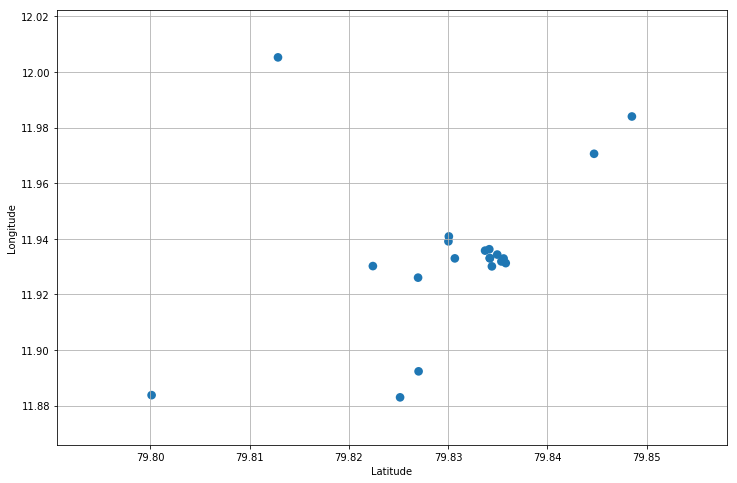

In [5]:
fig = plt.figure(figsize=(12,8))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(df['Longitude'], df['Latitude'],
            cmap=cmap, norm=norm, s=75, edgecolor='none')
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Longitude', fontsize=10)
plt.grid()
plt.show()

In [6]:
#K-means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++')#n_clusters = 3 because I am planning this based on 3 days trip 
X = df[['Longitude','Latitude']].values
y_kmeans = kmeans.fit_predict(X)

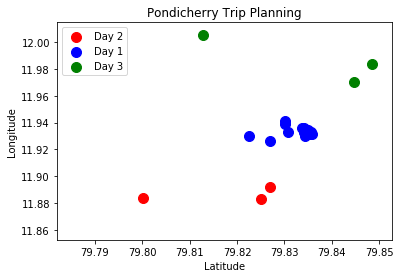

In [7]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Day 2')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Day 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Day 3')
plt.title('Pondicherry Trip Planning')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

In [8]:
clustered = pd.concat([df.reset_index(), 
                       pd.DataFrame({'Cluster':y_kmeans})], 
                      axis=1)
clustered.drop('index',axis = 1,inplace = True)
clustered

,Longitude,Latitude,Landmark,Cluster
0,79.835802,11.931277,Promenade Beach,1
1,79.812865,12.005282,Auroville,2
2,79.844698,11.970605,Serenity Beach,2
3,79.825160,11.883001,Paradise Beach,0
4,79.827025,11.892355,Veerampattinam Beach,0
5,79.800136,11.883794,Chunnambar Boat House,0
6,79.848507,11.984018,Auroville Beach,2
7,79.833720,11.935773,Arulmigu Manakula Vinayagar Temple,1
8,79.826972,11.926058,The Sacred Heart Basilica,1
9,79.834407,11.930112,Lady Des Angels - Notre Dames Church,1


In [10]:
#Organising based on Days
conditions = [
    clustered['Cluster'] == 0,
    clustered['Cluster'] == 1, 
    clustered['Cluster'] == 2
]
days = ['Friday','Saturday','Sunday']
clustered['Vacation Day'] = np.select(conditions,days)
clustered = clustered.sort_values(by=['Vacation Day'])
clustered


,Longitude,Latitude,Landmark,Cluster,Vacation Day
3,79.825160,11.883001,Paradise Beach,0,Friday
4,79.827025,11.892355,Veerampattinam Beach,0,Friday
5,79.800136,11.883794,Chunnambar Boat House,0,Friday
15,79.834203,11.933078,Aayi Mandapam,1,Saturday
7,79.833720,11.935773,Arulmigu Manakula Vinayagar Temple,1,Saturday
8,79.826972,11.926058,The Sacred Heart Basilica,1,Saturday
18,79.830030,11.939110,Kanniga Parameshwari Kovil,1,Saturday
10,79.830675,11.932986,Immaculate Conception Cathedral,1,Saturday
11,79.830072,11.940888,Sri Varadaraja Perumal Temple,1,Saturday
9,79.834407,11.930112,Lady Des Angels - Notre Dames Church,1,Saturday
